In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
toyota = pd.read_csv('./ToyotaCorolla.csv')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
# 데이터의 수와 변수의 수 확인하기
nCar = toyota.shape[0]
nVar = toyota.shape[1]
print(nCar, nVar)

1436 37


In [4]:
# Fuel_Type 명목형 변수(범주형)을 이진형 변수로 변환

In [5]:
# Fuel_Type 변수 값 조사
toyota['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [4]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_a = np.repeat(0, nCar)
dummy_b = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [5]:
a_mask = np.array(toyota['Fuel_Type'] == 'Diesel')
b_mask = np.array(toyota['Fuel_Type'] == 'Petrol')
c_mask = np.array(toyota['Fuel_Type'] == 'CNG')

In [6]:
dummy_a[a_mask] = 1
dummy_b[b_mask] = 1
dummy_c[c_mask] = 1

In [9]:
# 불필요한 변수 제거(id, Model) 및 가변수 추가(Diesel, Petrol, CNG)

In [7]:
Fuel = pd.DataFrame({'Diesel' : dummy_a, 'Petrol' : dummy_b, 'CNG' : dummy_c})

In [8]:
toyota_ = toyota.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mir_data = pd.concat((toyota_, Fuel), axis = 1)

In [12]:
mir_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,1,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,1,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,1,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,1,0


In [9]:
# 상수항 추가
mir_data2 = sm.add_constant(mir_data, has_constant='add')
mir_data2.head()

D:\Anaconda3\envs\opensource\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,1,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,1,0,0


In [14]:
# 설명변수, 타겟변수 분리 및 학습데이터와 평가데이터로 분할

In [16]:
mir_data2.columns.difference(['Price']) # 특정 변수를 제외할 수 있다.

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [10]:
feature_columns = list(mir_data2.columns.difference(['Price']))

X = mir_data2[feature_columns]
y = mir_data2['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1005, 37) (1005,) (431, 37) (431,)


In [11]:
# Train the MLR / 회귀 모델 적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [12]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     332.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:21:02   Log-Likelihood:                -8440.6
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     972   BIC:                         1.711e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -376.3364    136.195     -2.763      0.006    -643.607    -109.066
Age_08_04         -120.9014      4.073    -29.680      0.000    -128.895    -112.908
Airbag_1           164.6406    257.044      0.641      0.522    -339.785     669.066
Airbag_2           -72.1668    138.164     -0.522      0.602    -343.300     198.967
Airco              213.2796     93.592      2.279      0.023      29.613     396.946
Automatic          158.8119    166.433      0.954      0.340    -167.797     485.420
Automatic_airco   2470.5094    199.480     12.385      0.000    2079.049    2861.970
BOVAG_Guarantee    499.5758    132.201      3.779      0.000     240.144     759.007
Backseat_Divider  -295.0252    133.575     -2.209      0.027    -557.153     -32.897
Boardcomputer     -323.2004    122.232     -2.644      0.008    -563.070     -83.331
CD_Player          187.0637    104.341      1.793      0.073     -17.696     391.823
CNG               -901.2128    251.244     -3.587      0.000   -1394.256    -408.170
Central_Lock        -7.2606    154.919     -0.047      0.963    -311.276     296.754
Cylinders           -0.0382      0.002    -15.922      0.000      -0.043      -0.033
Diesel            -355.2883    208.579     -1.703      0.089    -764.605      54.029
Doors                7.5567     42.721      0.177      0.860     -76.279      91.392
Gears              141.8991    214.217      0.662      0.508    -278.481     562.279
Guarantee_Period    78.0689     14.815      5.270      0.000      48.997     107.141
HP                  12.3608      3.714      3.328      0.001       5.072      19.650
KM                  -0.0152      0.001    -11.371      0.000      -0.018      -0.013
Met_Color           -2.0192     78.841     -0.026      0.980    -156.737     152.699
Metallic_Rim       205.5893    100.370      2.048      0.041       8.623     402.555
Mfg_Month          -98.3693     10.882     -9.039      0.000    -119.725     -77.014
Mfg_Year            -0.8599      0.929     -0.926      0.355      -2.682       0.963
Mfr_Guarantee      265.6078     77.078      3.446      0.001     114.350     416.866
Mistlamps          -38.4758    113.257     -0.340      0.734    -260.731     183.780
Petrol            1256.4915    205.485      6.115      0.000     853.246    1659.737
Power_Steering     -76.3939    310.577     -0.246      0.806    -685.873     533.085
Powered_Windows    254.5969    154.240      1.651      0.099     -48.085     557.278
Quarterly_Tax       13.6813      1.867      7.326      0.000      10.017      17.346
Radio              -12.1799     55.004     -0.221      0.825    -120.119      95.759
Radio_cassette     -12.1799     55.004     -0.221      0.825    -120.119      95.759
Sport_Model        219.4668     93.088      2.358      0.019      36.789     402.144
Tow_Bar           -243.

In [13]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mir_data2.values, i) for i in range(mir_data2.shape[1])]
vif['Features'] = mir_data2.columns
vif

D:\Anaconda3\envs\opensource\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Anaconda3\envs\opensource\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,Features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


In [15]:
# 학습 데이터의 잔차 확인
res = fitted_full_model.resid
# print(res)

# q-q plot (정규분포 확인)
fig = sm.qqplot(res, fit=True, line='45')
fig.show()

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


In [18]:
# residual pattern 확인
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Residual')

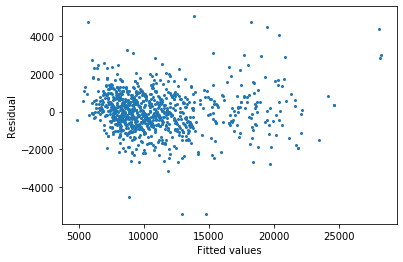

In [19]:
pred_y = fitted_full_model.predict(train_x)
fig = plt.scatter(pred_y, res, s=4)

# plt.xlim(4000,30000)
# plt.ylim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [20]:
# 검증 데이터에 대한 예측
pred_y2 = fitted_full_model.predict(test_x)

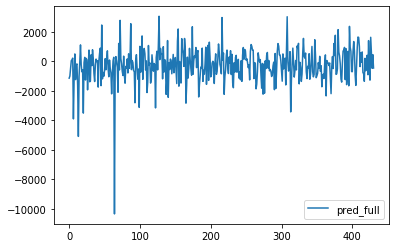

In [21]:
# 잔차 plot
plt.plot(np.array(test_y - pred_y2), label="pred_full")
plt.legend()
plt.show()

In [22]:
# MSE 계산
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(test_y, pred_y2)

1412353.8719013415

In [24]:
# 변수 선택법

In [25]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])   # 회귀 적합
    regr = model.fit()   # 모델 학습
    AIC = regr.aic    # 모델의 AIC
    return {"model" : regr, "AIC" : AIC}

# print(processSubset(X = train_x, y = train_y, feature_set = ['const']))
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000000B0BFE10>, 'AIC': 19108.185093412194}


In [77]:
processSubset(X = train_x, y = train_y, feature_set = ['const'])['model'].summary()

D:\Anaconda3\envs\opensource\lib\site-packages\statsmodels\regression\linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                nan
Time:                        19:14:25   Log-Likelihood:                -9650.4
No. Observations:                1005   AIC:                         1.930e+04
Df Residuals:                    1004   BIC:                         1.931e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.078e+04    113.021     95.362      0.000    1.06e+04     1.1e+04
==============================================================================
Omnibus:                      329.839   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              987.793
Skew:                           1.647   Prob(JB):                    3.19e-215
Kurtosis:                       6.569   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
processSubset(X = train_x, y = train_y, feature_set = feature_columns)   # full model의 AIC

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0xec88b00>,
 'AIC': 16947.272169554635}

In [27]:
# 모든 변수의 조합을 고려하여 가장 좋은 회귀 모델을 반환하는 함수
import time
import itertools

In [34]:
# 가장 낮은 AIC를 가지는 모델 선택 및 저장(getBest function)
# X : 설명변수 데이터프레임, y : 종속변수 데이터프레임, k = 변수의 수
def getBest(X, y, k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = (list(combo) + ['const'])
        results.append(processSubset(X, y, feature_set = combo))
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].idxmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], " models on ", k, "predictors in", (toc-tic), " seconds.")
    return best_model

In [35]:
print(getBest(X = train_x, y = train_y, k = 2))

Processed  630  models on  2 predictors in 0.8940510749816895  seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17550.5
Name: 211, dtype: object


In [36]:
# 변수 선택 수에 따른 학습시간 조사 및 결과 저장
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1, 4):
    models.loc[i] = getBest(X = train_x, y = train_y, k = i)
toc = time.time()
print("Total elapsed time: ", (toc-tic), " seconds.")

Processed  36  models on  1 predictors in 0.09700560569763184  seconds.
Processed  630  models on  2 predictors in 0.7600436210632324  seconds.
Processed  7140  models on  3 predictors in 10.052574872970581  seconds.
Total elapsed time:  11.04963207244873  seconds.


In [37]:
models

,AIC,model
1,17814.260637,<statsmodels.regression.linear_model.Regressio...
2,17550.521508,<statsmodels.regression.linear_model.Regressio...
3,17387.009224,<statsmodels.regression.linear_model.Regressio...


In [38]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1925.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:00:36   Log-Likelihood:                -8689.5
No. Observations:                1005   AIC:                         1.739e+04
Df Residuals:                    1001   BIC:                         1.741e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0242      0.001    -17.011      0.000      -0.027      -0.021
Mfg_Year    1458.1901     39.540     36.879      0.000    1380.599    1535.781
Weight        19.5707      0.989     19.783      0.000      17.630      21.512
const      -2.924e+06   7.85e+04    -37.234      0.000   -3.08e+06   -2.77e+06
==============================================================================
Omnibus:                      237.545   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3347.172
Skew:                          -0.668   Prob(JB):                         0.00
Kurtosis:                      11.840   Cond. No.                     1.39e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# 모든 변수들 모델링 한 것과 비교
print("full model R-Squared: {}".format(fitted_full_model.rsquared))
print("full model AIC: {}".format(fitted_full_model.aic))
print("selected R-Squared: {}".format(models.loc[3, 'model'].rsquared))
print("selected model AIC: {}".format(models.loc[3, 'model'].aic))

full model R-Squared: 0.9093141805642966
full model AIC: 16956.432964595166
selected R-Squared: 0.85224779495902
selected model AIC: 17387.00922371611


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]
D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in th

Text(0, 0.5, 'BIC')

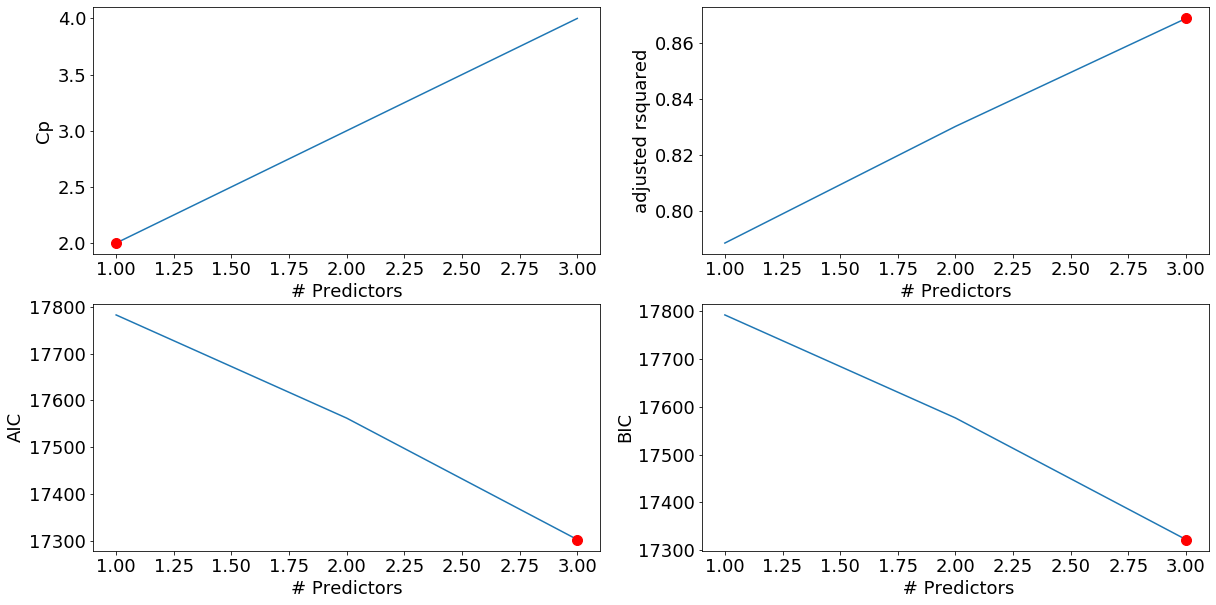

In [86]:
# plot Mallow Cp, Adjusted R-Squared, AIC, BIC graph
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size' : 18, 'lines.markersize' : 10})

# Mallow Cp
plt.subplot(2, 2, 1)
# Cp = models.apply(lambda row : row[1].params.shape[0] + (row[1].mse_total -
#                         fitted_full_model.mse_total) * (train_x.shape[0] - 
#                             row[1].params.shape[0]) / fitted_full_model.mse_total
#                               , axis = 1)
# models.apply(lambda row : print(row[1].params), axis = 1)
Cp = models.apply(lambda row : row[, axis = 1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')



# 전진선택법 (step = 1)

In [28]:
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X = X, y = y, feature_set = predictors+[p]+['const']))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].idxmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], " models on ", len(predictors) + 1, "predictors in ", (toc-tic))
    print("Selected predictors: ", best_model['model'].model.exog_names, 'AIC : ', best_model['AIC'])
    
    return best_model   

In [29]:
# 전진 선택법 모델
def forward_model(X, y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
                
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i, 'model'].model.exog_names
        Fmodel_before = Fmodels.loc[i, 'AIC']
        predictors = [predictor for predictor in predictors if predictor != 'const']
        
    toc = time.time()
    print("Total elapsed time : {}".format(toc-tic))   
    return Fmodels.loc[len(Fmodels['model']), "model"]

In [30]:
Forward_best_model = forward_model(X = train_x, y = train_y)

Processed  36  models on  1 predictors in  0.09700560569763184
Selected predictors:  ['Mfg_Year', 'const'] AIC :  17830.519585970902
Processed  35  models on  2 predictors in  0.05600333213806152
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] AIC :  17524.560086858055
Processed  34  models on  3 predictors in  0.07900452613830566
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC :  17387.045589488655
Processed  33  models on  4 predictors in  0.044002532958984375
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] AIC :  17158.99307416506
Processed  32  models on  5 predictors in  0.06000328063964844
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'const'] AIC :  17104.770427790918
Processed  31  models on  6 predictors in  0.05700325965881348
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'const'] AIC :  17081.43115510823
Processed  30  mode

In [31]:
Forward_best_model.aic

16928.535229491565

In [32]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     535.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:28:45   Log-Likelihood:                -8443.3
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     984   BIC:                         1.703e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year            -1.0805      0.698     -1.548      0.122      -2.450       0.289
Automatic_airco   2456.8168    188.316     13.046      0.000    2087.269    2826.364
Weight              15.6362      1.204     12.982      0.000      13.273      18.000
KM                  -0.0152      0.001    -11.525      0.000      -0.018      -0.013
HP                  10.1453      3.220      3.151      0.002       3.827      16.464
Powered_Windows    245.4875     85.426      2.874      0.004      77.849     413.126
Guarantee_Period    81.0923     14.473      5.603      0.000      52.691     109.494
BOVAG_Guarantee    530.2952    128.790      4.118      0.000     277.560     783.031
Quarterly_Tax       13.8105      1.797      7.684      0.000      10.284      17.338
Petrol            1835.4033    279.352      6.570      0.000    1287.210    2383.597
Tow_Bar           -242.1653     80.272     -3.017      0.003    -399.689     -84.642
ABS               -405.8853    103.770     -3.911      0.000    -609.522    -202.249
Boardcomputer     -322.6742    119.275     -2.705      0.007    -556.737     -88.612
Mfr_Guarantee      264.9920     75.897      3.491      0.001     116.053     413.931
Mfg_Month          -98.4810     10.724     -9.184      0.000    -119.525     -77.437
Airco              204.9176     88.844      2.306      0.021      30.573     379.263
Metallic_Rim       207.0348     92.926      2.228      0.026      24.680     389.390
Sport_Model        224.0482     87.447      2.562      0.011      52.444     395.652
Backseat_Divider  -314.9388    121.191     -2.599      0.009    -552.761     -77.116
CD_Player          162.4699     99.675      1.630      0.103     -33.130     358.070
Age_08_04         -120.6137      3.872    -31.146      0.000    -128.213    -113.014
Cylinders           -0.0386      0.002    -18.290      0.000      -0.043      -0.034
const               -0.0096      0.001    -18.290      0.000      -0.011      -0.009
==============================================================================
Omnibus:                       87.168   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.342
Skew:                           0.207   Prob(JB):                     9.70e-94
Kurtosis:                       6.171   Cond. No.                     2.25e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진 소거법

In [33]:
# 후진 소거법 (step = 1)
# input : X -> 상수항 포함한 독립변수 데이터프레임
#         y -> 종속변수 데이터프레임, predictors -> 미리 선택한 종속변수 세트(상수항 제외)
# output : lowest AIC model
def backward(X,y,predictors):
    results = []   
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)    
    best_model = models.loc[models['AIC'].argmin()]
    
    return best_model

In [34]:
# 후진 소거법 모델
# input : X -> 상수항 포함한 독립변수 데이터프레임
#         y -> 종속변수 데이터프레임
# output : lowest AIC model
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    
    full_model_predictors = X.columns.difference(['const'])
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)
    Bmodel_before_aic = Bmodel_before['AIC']
    
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        
        if Backward_result['AIC'] > Bmodel_before_aic:
            break
       
        # insert model tuple in dataframe, and update predictor set, AIC threshold
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before_aic = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if (len(predictors) == len(full_model_predictors)):   #  while문을 탈출한 순간이 첫 번째 변수를 삭제한 순간인 경우
        return pd.DataFrame({'AIC' : Bmodel_before['AIC'], 'model' : Bmodel_before['model']})
    else:
        return (Bmodels['model'].dropna().iloc[0])

In [35]:
Backward_best_model = backward_model(X = train_x, y = train_y)

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Total elapsed time: 1.4700839519500732 seconds.


In [36]:
Backward_best_model.aic

16930.83395924393

In [37]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     487.0
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:33:41   Log-Likelihood:                -8442.4
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     982   BIC:                         1.704e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -415.4462    104.056     -3.993      0.000    -619.645    -211.248
Airco              200.8362     88.941      2.258      0.024      26.300     375.373
Automatic_airco   2449.4124    188.649     12.984      0.000    2079.211    2819.614
BOVAG_Guarantee    531.3857    129.648      4.099      0.000     276.967     785.805
Backseat_Divider  -318.9562    121.673     -2.621      0.009    -557.726     -80.187
Boardcomputer     -328.0082    119.926     -2.735      0.006    -563.348     -92.668
CD_Player          170.5121    101.483      1.680      0.093     -28.637     369.661
CNG              -5.685e+04   1842.769    -30.850      0.000   -6.05e+04   -5.32e+04
Cylinders        -6.714e+05   2.18e+04    -30.825      0.000   -7.14e+05   -6.29e+05
Diesel           -5.634e+04   1817.172    -31.006      0.000   -5.99e+04   -5.28e+04
Guarantee_Period    80.6176     14.561      5.537      0.000      52.044     109.191
HP                  11.7665      3.458      3.403      0.001       4.981      18.552
KM                  -0.0152      0.001    -11.562      0.000      -0.018      -0.013
Metallic_Rim       210.8919     93.007      2.267      0.024      28.376     393.408
Mfg_Month           22.4248     10.765      2.083      0.038       1.299      43.550
Mfg_Year          1450.6352     47.349     30.637      0.000    1357.718    1543.552
Mfr_Guarantee      265.6702     76.001      3.496      0.000     116.528     414.812
Petrol           -5.466e+04   1822.355    -29.992      0.000   -5.82e+04   -5.11e+04
Powered_Windows    248.5477     85.474      2.908      0.004      80.815     416.281
Quarterly_Tax       13.6283      1.803      7.558      0.000      10.090      17.167
Radio               -8.9207     53.938     -0.165      0.869    -114.768      96.927
Radio_cassette      -8.9207     53.938     -0.165      0.869    -114.768      96.927
Sport_Model        229.7569     87.875      2.615      0.009      57.313     402.200
Tow_Bar           -238.0926     80.989     -2.940      0.003    -397.024     -79.162
Weight              15.1465      1.263     11.990      0.000      12.667      17.626
const            -1.678e+05   5445.289    -30.825      0.000   -1.79e+05   -1.57e+05
==============================================================================
Omnibus:                       84.872   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.673
Skew:                           0.207   Prob(JB):                     3.64e-88
Kurtosis:                       6.073   Cond. No.                     1.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-20. 

# 단계적 선택법

In [38]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    
    # 시작은 전진 선택법(base)
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        # 전진 선택법 시행 후, 후진 소거법 시행
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        mid_model = Forward_result
        predictors = mid_model['model'].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        print('backward')    
        
        # 전진 선택법의 결과와 후진 소거법의 결과를 비교하여, AIC 값이 더 낮은 결과를 채팩
        if Backward_result['AIC']< Forward_result['AIC']:
            mid_model = Backward_result
            predictors = mid_model['model'].model.exog_names
            predictors = [ k for k in predictors if k != 'const']
        
        # 채택한 선택법의 AIC 결과가 threshold AIC 값보다 높은 경우, 더 이상 프로세스를 실행할 수 없음
        if mid_model['AIC'] > Smodel_before:
            break
        # 채택한 선택법의 AIC 결과가 threshold AIC 값보다 낮은 경우,
        # Stepmodels 데이터프레임 데이터 추가 및 threshold AIC 값을 업데이트
        else:
            Stepmodels.loc[i] = mid_model
            Smodel_before = Stepmodels.loc[i]['AIC']
        
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    # i = 1에서, break 문을 만난 경우 Stepmodels 데이터프레임 내부에는 데이터가 없음
    if Stepmodels.iloc[0] is None:
        return processSubset(X, y, ['const'])['model']
    else:
        return (Stepmodels['model'][len(Stepmodels['model'])])

In [39]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36  models on  1 predictors in  0.07100367546081543
Selected predictors:  ['Mfg_Year', 'const'] AIC :  17830.519585970902
forward
backward
Processed  35  models on  2 predictors in  0.04200243949890137
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] AIC :  17524.560086858055
forward
backward
Processed  34  models on  3 predictors in  0.0870048999786377
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC :  17387.045589488655
forward
backward
Processed 

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


 33  models on  4 predictors in  0.05500316619873047
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] AIC :  17158.99307416506
forward
backward
Processed  32  models on  5 predictors in  0.041002511978149414
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'const'] AIC :  17104.770427790918
forward
backward
Processed  31  models on  6 predictors in  0.04200243949890137
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'const'] AIC :  17081.43115510823
forward
backward
Processed  30  models on  7 predictors in  0.04500269889831543
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Guarantee_Period', 'const'] AIC :  17059.89776392236
forward
backward
Processed  29  models on  8 predictors in  0.044002532958984375
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Guarantee_Period', 'BOVAG_Guarantee'

backward
Processed  15  models on  22 predictors in  0.054003238677978516
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Guarantee_Period', 'BOVAG_Guarantee', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'ABS', 'Boardcomputer', 'Mfr_Guarantee', 'Airco', 'Metallic_Rim', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Cylinders', 'Mfg_Month', 'Age_08_04', 'const'] AIC :  16928.535229491565
forward
backward
Processed  15  models on  22 predictors in  0.09000515937805176
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Guarantee_Period', 'BOVAG_Guarantee', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'ABS', 'Boardcomputer', 'Mfr_Guarantee', 'Airco', 'Metallic_Rim', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Cylinders', 'Mfg_Month', 'Age_08_04', 'const'] AIC :  16928.535229491565
forward
backward
Processed  15  models on  22 predictors in  0.03300213813781738
Selected predictors:  ['Mfg_Year', 'Automati

In [40]:
Stepwise_best_model.aic

16928.535229491506

In [41]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     535.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:37:49   Log-Likelihood:                -8443.3
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     984   BIC:                         1.703e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1446.2838     46.730     30.950      0.000    1354.582    1537.985
Automatic_airco   2456.8168    188.316     13.046      0.000    2087.269    2826.364
Weight              15.6362      1.204     12.982      0.000      13.273      18.000
KM                  -0.0152      0.001    -11.525      0.000      -0.018      -0.013
HP                  10.1453      3.220      3.151      0.002       3.827      16.464
Powered_Windows    245.4875     85.426      2.874      0.004      77.849     413.126
Guarantee_Period    81.0923     14.473      5.603      0.000      52.691     109.494
BOVAG_Guarantee    530.2952    128.790      4.118      0.000     277.560     783.031
Quarterly_Tax       13.8105      1.797      7.684      0.000      10.284      17.338
Petrol            1835.4033    279.352      6.570      0.000    1287.210    2383.597
Tow_Bar           -242.1653     80.272     -3.017      0.003    -399.689     -84.642
ABS               -405.8853    103.770     -3.911      0.000    -609.522    -202.249
Boardcomputer     -322.6742    119.275     -2.705      0.007    -556.737     -88.612
Mfr_Guarantee      264.9920     75.897      3.491      0.001     116.053     413.931
Airco              204.9176     88.844      2.306      0.021      30.573     379.263
Metallic_Rim       207.0348     92.926      2.228      0.026      24.680     389.390
Sport_Model        224.0482     87.447      2.562      0.011      52.444     395.652
Backseat_Divider  -314.9388    121.191     -2.599      0.009    -552.761     -77.116
CD_Player          162.4699     99.675      1.630      0.103     -33.130     358.070
Cylinders        -6.827e+05   2.19e+04    -31.146      0.000   -7.26e+05    -6.4e+05
Mfg_Month           22.1327     10.746      2.060      0.040       1.045      43.220
const            -1.707e+05   5480.034    -31.146      0.000   -1.81e+05    -1.6e+05
==============================================================================
Omnibus:                       87.168   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.342
Skew:                           0.207   Prob(JB):                     9.70e-94
Kurtosis:                       6.171   Cond. No.                     1.58e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 성능 평가

In [42]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (26,) (22,)


In [43]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [44]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [45]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [46]:
from sklearn import metrics

In [47]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.41235e+06  1.43659e+06  1.42261e+06  1.43659e+06
RMSE      1188.42      1198.58      1192.73      1198.58
MAE       840.445      846.532      844.178      846.532
MAPE      8.86432      8.91486      8.88926      8.91486


In [48]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
23
26
22
